In [9]:
import numpy as np # using import we can gain access to the code in the numpy module
import sympy as sp # using import we can gain access to the code in the sympy module
from scipy.constants import* # we use import* here so that we can access (variables, classes and methods...) without prefixing 
# them with the modules name 
import matplotlib.pyplot as plt # here we can gain access to the code in the matplot.pyplot module
import matplotlib # here we can gain access to the code in the matplotlib module
matplotlib.use('nbagg')# we can use the feature 'nbagg' to enable interactive figures in a live notebook session 
%matplotlib nbagg



# information about bismuth and phosphorus including nuclear spin, electron spin, g-factor for electron, g-factor for nucleus 
# and value for the hyperfine coupling 

# donor   =  [I  , S  , g_e   ,  g_n ,  A(Hz) ]
bismuth    = [9/2,1/2,2.00032,0.9135,1475.17e6]                
phosphorus = [1/2,1/2,1.9985 ,0.9135,117.53e6 ]

ub = physical_constants["Bohr magneton in Hz/T"][0] # defining the bohr magneton
Axx = bismuth[4]*1*10**-9 # converting the units of the hyperfine interaction into GHz for x component
Ayy = bismuth[4]*1*10**-9 # converting the units of the hyperfine interaction into GHz for y component
Azz = bismuth[4]*1*10**-9 # converting the units of the hyperfine interaction into GHz for z component
Axx1 = phosphorus[4]*1*10**-6 # converting the units of the hyperfine interaction into GHz for x component
Ayy1 = phosphorus[4]*1*10**-6 # converting the units of the hyperfine interaction into GHz for y component
Azz1 = phosphorus[4]*1*10**-6 # converting the units of the hyperfine interaction into GHz for z component
un = physical_constants["nuclear magneton in MHz/T"][0]*1e6 # defining the nuclear magneton and converting to Hertz

print('Bohr magneton is ',ub,'Hz/T')
print('nuclear magneton is ',un,'Hz/T')

Bohr magneton is  13996245042.0 Hz/T
nuclear magneton is  7622593.285 Hz/T


In [10]:
ge = 2.00032 # g-factor for electron
gn = 0.9135 # g-factor for nucleus 
we1 = (ub*ge/1e9)
we3 = (un*gn/1e9)
we12 = (ub*ge/1e6) # calculation of the electron zeeman energy
we32 = (un*gn/1e6) # calculation of the nuclear zeeman energy 
print('electron zeeman energy at 1T',we1,'GHz')
print('nuclear zeeman energy at 1T',we3,'GHz')

electron zeeman energy at 1T 27.996968882413437 GHz
nuclear zeeman energy at 1T 0.006963238965847499 GHz


In [11]:
def ang_mo_op(J): # declaration of function that takes a value of the nuclear spin
                 
    N=int(2*J+1) # dimensions of spin matrix found by using the value of nuclear spin
    
    J_plus = np.zeros((N,N)) # Matrix of zeroes produced, which has the dimensions NxN
    J_minus = np.zeros((N,N)) # Second Matrix of zeroes produced, which has the dimensions NxN
    Jz = np.zeros((N,N)) # Third Matrix of zeroes produced, which has the dimensions NxN 
    
    for n in range (N): # sweeping through the different rows of the matrix 
        for m in range(N): # sweeping through the different columns of the matrix
            if n==m+1:
                J_plus[n,m] = (J*(J+1)-(J-n)*(J-n+1))**0.5 # calculating individual elements of matrix
            if n==m-1:
                J_minus[n,m] = (J*(J+1)-(J-m)*(J-m+1))**0.5 # calculating individual elements of matrix
            if n==m:
                Jz[n,m] = J-n # calculating individual elements of matrix
    
    Jx = 0.5*(J_plus+J_minus)
    Jy = -0.5*1j*(J_plus-J_minus)
    return (Jx,Jy,Jz) # this will return the x,y and z components of the nuclear spin

In [12]:
Ix,Iy,Iz = ang_mo_op(9/2) # 9/2 is the nuclear spin of bismuth, and is input to the function ang_mo_op(), this returns the
# x, y and z component of the nuclear spin.

In [13]:
Id2 = np.identity(2)
Id10 = np.identity(10)
# remember Ix1, Iy1 and Iz1 matrices
Sx1 = np.matrix([ # electron spin components are all defined with their respective spin matrices. 
    [0,1/2],
    [1/2,0]
])
Sy1 = np.matrix([
    [0,-1j/2],
    [1j/2,0]
])
Sz1 = np.matrix([
    [1/2,0],
    [0,-1/2]
])

In [14]:
import sys
np.set_printoptions(threshold=sys.maxsize) # so that the whole matrix can be seen

def final_matrix3(L,O): # taking the range of magnetic field and detuning values

    wall = np.zeros((40,40)) # defines a matrix of zeros with dimension 40x40
    E1 = we1*L*Sz1 # Zeeman energy of the electron
    E2 = we3*L*Iz  # Zeeman energy of the nucleus
    R1 = np.kron(Id10,E1)  # increasing basis for consistency
    R2 = np.kron(E2,Id2)   # increasing basis for consistency
    TC = 5#((((1*10**-6)*(1.6*10**-19))/h)*1*10**-9)*4
    V = np.zeros((20,20))
    np.fill_diagonal(V,TC) # the tunnel coupling value can be set to 1 GHz
    DT = np.zeros((20,20))
    np.fill_diagonal(DT,O) # the detuning value will be swept over a range
    T = R1 + R2 + DT
    T1 = np.kron(Id10,Sx1) # the kronecker product is used so that the basis states are the same 
    T2 = np.kron(Ix,Id2)    
    T12 = Axx*(T2*T1)

    T3 = np.kron(Id10,Sy1) # the kronecker product is used so that the basis states are the same 
    T4 = np.kron(Iy,Id2)
    T34 = Ayy*(T4*T3)

    T5 = np.kron(Id10,Sz1) # the kronecker product is used so that the basis states are the same 
    T6 = np.kron(Iz,Id2)
    T56 = Azz*(T6*T5)
    BMF = R1+R2+T56+T34+T12-DT
    #T = np.matrix([
    #    [1,2,3,4,5],
    #    [5,6,7,8,9],
    #    [1,2,3,4,5],
    #    [5,6,7,8,9],
    #    [1,2,3,4,5]
    #])
    #wall[x:x+T.shape[0], y:y+T.shape[1]] = T
    #print(wall)
    #per = np.zeros((10,10))
    x = 0 # number of rows down (remember 0 is the start)
    y = 0 # number of columns across
    wall[x:x+T.shape[0], y:y+T.shape[1]] = T
    a = 0
    b = 20
    wall[a:a+V.shape[0], b:b+V.shape[1]] = V
    c = 20
    d = 0
    wall[c:c+V.shape[0], d:d+V.shape[1]] = V
    e = 20
    f = 20
    wall[e:e+BMF.shape[0], f:f+BMF.shape[1]] = BMF
    return(wall)

In [15]:
magnetic_sweep_list = np.linspace(0,0.5,1000) # this returns a set of evenly spaced magnetic field values over a specified 
# interval, in this case starting at the value of 0T to a value of 0.5T with 1000 points inbetween.
detuning_sweep_list = np.linspace(-14,14,1000)
rows = 40
len_magnetic_sweep_list = len(magnetic_sweep_list) 
energy = np.zeros((rows, len_magnetic_sweep_list))
# defines a matrix of zeroes that is the length of magnetic_sweep_list,it has dimensions 
# (1000,)

for j in range(len_magnetic_sweep_list):  # sweeps through each value in the magnetic_sweep_list
    YU = final_matrix3(1.5,detuning_sweep_list[j]) # each value in magnetic_sweep_list is input into the function final_matrix 
    # the resulting matrix has to now be diagonalized to find the corresponding eigenvalues

    eigenvalues , eigenvector =  np.linalg.eigh(YU)
#     idx = np.argsort(eigenvalues)
# #   eigenvalues = eigenvalues[idx]
# #    idx = eigenvalues.argsort()[::-1]   
#     eigenvalues = eigenvalues[idx]
#     eigenvector = eigenvector[:,idx]
# #    eigenvector = eigenvector[:,idx]
    
    for i in range(rows):
        energy[i][j] = (eigenvalues[i])*-1

C:\Users\devan\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


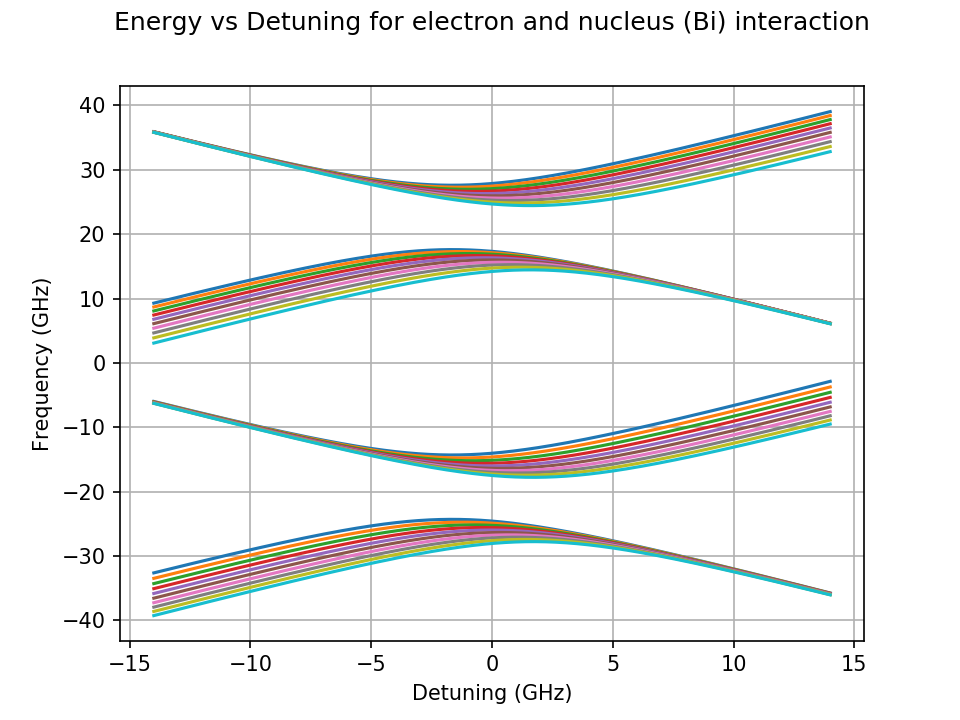

In [16]:
plt.figure()
for i in range(rows):
    plt.plot(detuning_sweep_list,energy[i])
plt.xlabel('Detuning (GHz)')
plt.ylabel('Frequency (GHz)')
plt.title('Energy vs Detuning for electron and nucleus (Bi) interaction', y=1.08)
plt.grid()